## Understanding Decision Trees
What is a Decision Tree?
A Decision Tree is a type of supervised machine learning algorithm used for both classification and regression tasks. It works like a flowchart structure where each internal node represents a decision based on a feature, each branch represents an outcome of the decision, and each leaf node represents a final prediction or result. Decision Trees model decisions and their possible consequences by learning simple decision rules inferred from the data features.

Why Use Decision Trees?
Easy to Understand and Interpret: The model's flowchart-like structure makes it easy to visualize and understand, even for people without a strong background in machine learning.
No Need for Feature Scaling: Unlike algorithms such as SVM or KNN, Decision Trees do not require normalization or scaling of data.
Handles Both Types of Data: They can work with both numerical and categorical data.
Minimal Data Preparation: Requires less data cleaning compared to other algorithms. Missing values and outliers often do not significantly impact their performance.
Real-World Applications
Medical Diagnosis: Used to predict diseases or health conditions based on patient data.
Credit Risk Analysis: Helps financial institutions decide whether to approve or deny loans based on an applicant's credit history.
Customer Segmentation: Used in marketing to classify customer behavior and target specific groups.
Fraud Detection: Detects fraudulent activities by analyzing patterns in transactional data.
Recommendation Systems: Suggests products or services based on user preferences and historical data.

Anatomy of a Decision Tree:

Root Node
The topmost node in a decision tree. It represents the entire dataset, which is then split into subsets based on a specific feature. The root node acts as the starting point for making decisions.

Internal Nodes (Decision Nodes)
These are nodes that represent tests or decisions on an attribute. Based on the outcomes of these decisions, the tree splits further into branches.

Leaf Nodes (Terminal Nodes)
These are the final nodes of a decision tree that provide the output label or prediction. Once data reaches a leaf node, the decision-making process ends.

Branches (Edges)
The branches represent the outcome of a decision and lead to the next node (which can be another decision node or a leaf node).



How Decision Trees Work
Splitting the Dataset
At each node, the data is divided into subsets based on specific feature conditions. The goal is to create child nodes that are more homogeneous (i.e., contain more similar instances) than the parent node.
Selecting the Best Splits
Decision Trees use different algorithms to determine the best attribute and split point:
Gini Impurity: Measures the frequency of incorrect classifications.
Entropy and Information Gain: Measures the amount of information a split provides.
The feature and threshold that provide the highest information gain or lowest impurity are selected.
Recursive Partitioning
The splitting process is applied recursively to each child node until one of the stopping criteria is met:
All records in a node belong to the same class.
There are no remaining features to split on.
The maximum tree depth is reached.
The node contains fewer records than the minimum sample split threshold.
Tree Depth and Stopping Conditions
Decision Trees can grow very deep, which may lead to overfitting. Stopping criteria and hyperparameters such as max_depth, min_samples_split, and min_samples_leaf help prevent this.
Stopping conditions ensure:
The model does not overfit by growing unnecessarily complex trees.
The model maintains a balance between bias and variance.

In [1]:
import matplotlib.pyplot as plt
# Building a basic Decision Tree
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
# preparing the data
from sklearn.datasets import load_iris

# Prepare data
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [4]:
# Predict and evaluate
predictions = clf.predict(X_test)
print("Predictions:", predictions)
print("Accuracy:", clf.score(X_test, y_test) * 100)

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Accuracy: 100.0


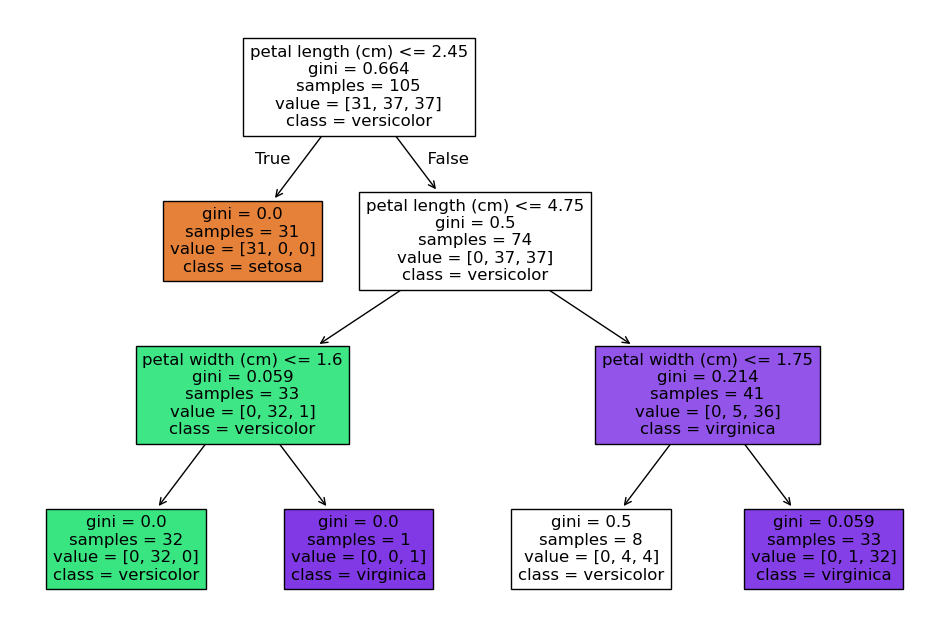

In [5]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [6]:
# Cross-Validation to check for consistent accuracy
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 1.         1.        ]
Mean Accuracy: 0.9733333333333334


# Advanced Decision Tree & Ensemble Workflow
We will now be learning about common preprocessing techniques for Decision Trees and how to use them effectively.

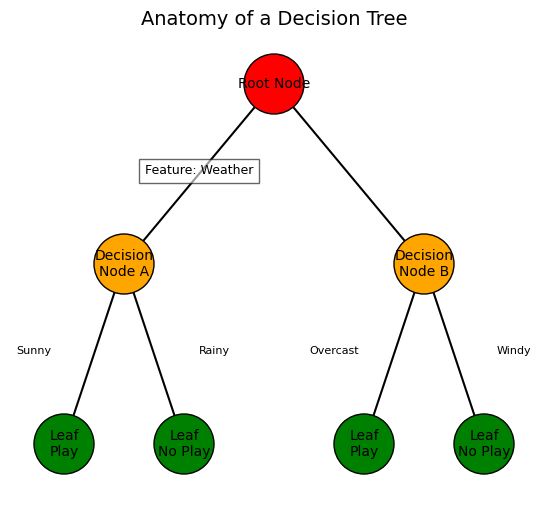

In [7]:
# Anatomy Of a Decision Tree
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(10, 6))

# Define node positions (manually for simplicity)
positions = {
    'Root': (0.5, 1.0),
    'Node_A': (0.25, 0.7),
    'Node_B': (0.75, 0.7),
    'Leaf_A1': (0.15, 0.4),
    'Leaf_A2': (0.35, 0.4),
    'Leaf_B1': (0.65, 0.4),
    'Leaf_B2': (0.85, 0.4),
}


# Plot nodes
def draw_node(name, pos, node_type):
    x, y = pos
    if node_type == 'root':
        color = 'red'
    elif node_type == 'decision':
        color = 'orange'
    elif node_type == 'leaf':
        color = 'green'

    circle = plt.Circle((x, y), 0.05, color=color, ec='black', zorder=3)
    plt.gca().add_patch(circle)
    plt.text(x, y, name, ha='center', va='center', fontsize=10, zorder=4)


# Draw edges/branches
def draw_branch(start, end):
    x1, y1 = positions[start]
    x2, y2 = positions[end]
    plt.plot([x1, x2], [y1, y2], 'k-', zorder=1)


# Draw the nodes
draw_node('Root Node', positions['Root'], 'root')
draw_node('Decision\nNode A', positions['Node_A'], 'decision')
draw_node('Decision\nNode B', positions['Node_B'], 'decision')
draw_node('Leaf\nPlay', positions['Leaf_A1'], 'leaf')
draw_node('Leaf\nNo Play', positions['Leaf_A2'], 'leaf')
draw_node('Leaf\nPlay', positions['Leaf_B1'], 'leaf')
draw_node('Leaf\nNo Play', positions['Leaf_B2'], 'leaf')

# Draw branches
draw_branch('Root', 'Node_A')
draw_branch('Root', 'Node_B')
draw_branch('Node_A', 'Leaf_A1')
draw_branch('Node_A', 'Leaf_A2')
draw_branch('Node_B', 'Leaf_B1')
draw_branch('Node_B', 'Leaf_B2')

# Annotations for labels
plt.text(0.375, 0.85, 'Feature: Weather', ha='center', fontsize=9, bbox=dict(facecolor='white', alpha=0.6))
plt.text(0.1, 0.55, 'Sunny', ha='center', fontsize=8)
plt.text(0.4, 0.55, 'Rainy', ha='center', fontsize=8)
plt.text(0.6, 0.55, 'Overcast', ha='center', fontsize=8)
plt.text(0.9, 0.55, 'Windy', ha='center', fontsize=8)

# Aesthetic settings
plt.gca().set_aspect('equal')
plt.axis('off')
plt.title('Anatomy of a Decision Tree', fontsize=14)
plt.show()


In [8]:
# 📚 Studying Gini Impurity and How Decision Trees Split
import pandas as pd
from sklearn.datasets import load_iris

# 🟢 Load Iris dataset (classic ML dataset for classification)
iris = load_iris()

# 🟢 Convert to a DataFrame for easier manipulation and readability
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 🟢 Add the target (species) as a new column
iris_data['target'] = iris.target

# 🟢 Optional: Map numeric targets to species names (human-readable)
iris_data['species'] = iris_data['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 🟢 Drop the numeric target column to avoid confusion (we'll use species names)
iris_data = iris_data.drop(columns=['target'])

# 🟢 Show the first few rows of the dataset
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# 🔷 Gini Impurity Calculation 🔷
# This function calculates the Gini impurity for a set of labels.
# Lower impurity means the node is more "pure" (one class dominates).
def gini_impurity(labels):
    total = len(labels)
    if total == 0:
        return 0
    # Count how many times each label occurs
    counts = labels.value_counts()
    impurity = 1.0
    # Subtract the squared probabilities from 1 to get impurity
    for label in counts.index:
        prob_of_label = counts[label] / total
        impurity -= prob_of_label ** 2
    return impurity

In [10]:
# 🔷 Split Data Function 🔷
# This function splits the dataset into two groups:
# Left split = rows where feature < value
# Right split = rows where feature >= value
def split_data(data, feature, value):
    left_split = data[data[feature] < value]
    right_split = data[data[feature] >= value]
    return left_split, right_split

In [11]:
# 🔷 Information Gain Calculation 🔷
# This function computes how much Gini impurity is reduced by making a split.
# It helps us choose the best feature/value combination to split on.
def info_gain(left, right, current_uncertainty):
    # p = proportion of samples in the left split
    p = float(len(left)) / (len(left) + len(right))
    # Subtract the weighted impurity of the left and right splits from current uncertainty
    return current_uncertainty - p * gini_impurity(left['species']) - (1 - p) * gini_impurity(right['species'])


In [12]:
# 🔷 Find the Best Split 🔷
# This function loops through all features and their unique values,
# looking for the split that results in the highest information gain.
def find_best_split(data):
    best_gain = 0
    best_feature = None
    best_value = None
    # Calculate impurity of the current dataset (before splitting)
    current_uncertainty = gini_impurity(data['species'])

    # Exclude the target column (species) from features
    n_features = len(data.columns) - 1

    for feature in data.columns[:-1]:  # Skip the species column
        values = data[feature].unique()  # All unique values of the feature
        for val in values:
            # Split data at this feature and value
            left, right = split_data(data, feature, val)
            # Ignore splits that don't divide the dataset
            if len(left) == 0 or len(right) == 0:
                continue
            # Calculate information gain from this split
            gain = info_gain(left, right, current_uncertainty)
            # Update best gain/feature/value if this split is better
            if gain > best_gain:
                best_gain, best_feature, best_value = gain, feature, val

    return best_gain, best_feature, best_value

In [13]:
# 🔷 Build the Tree (Recursive Partitioning) 🔷
# This function builds the decision tree recursively.
def build_tree(data):
    gain, feature, value = find_best_split(data)

    # Stopping condition: no information gain (pure node or no features left)
    if gain == 0:
        # Return the most common label (majority class) as a leaf
        return {'Leaf': data['species'].mode()[0]}

    # Split data into two groups based on the best split
    left, right = split_data(data, feature, value)

    # Recursively build the left and right branches of the tree
    true_branch = build_tree(left)
    false_branch = build_tree(right)

    # Return a dictionary representing this node and its branches
    return {
        'Feature': feature,
        'Value': value,
        'TrueBranch': true_branch,
        'FalseBranch': false_branch
    }


In [14]:
# 🔷 Build the Tree from the Iris Dataset 🔷
tree = build_tree(iris_data)

from pprint import pprint  # Pretty print the tree structure

pprint(tree)


{'FalseBranch': {'FalseBranch': {'FalseBranch': {'Leaf': 'virginica'},
                                 'Feature': 'petal length (cm)',
                                 'TrueBranch': {'FalseBranch': {'Leaf': 'virginica'},
                                                'Feature': 'sepal length (cm)',
                                                'TrueBranch': {'Leaf': 'versicolor'},
                                                'Value': np.float64(6.0)},
                                 'Value': np.float64(4.9)},
                 'Feature': 'petal width (cm)',
                 'TrueBranch': {'FalseBranch': {'FalseBranch': {'FalseBranch': {'Leaf': 'virginica'},
                                                                'Feature': 'sepal '
                                                                           'length '
                                                                           '(cm)',
                                                                'TrueBranch

In [15]:
# 🔷 Classify a Single Sample 🔷
# This function traverses the tree to make a prediction on a single sample.
def classify(sample, node):
    # If we reached a leaf, return the prediction
    if 'Leaf' in node:
        return node['Leaf']

    # Check the feature's value for this sample
    feature_val = sample[node['Feature']]

    # Decide to go left (TrueBranch) or right (FalseBranch) based on the split value
    if feature_val < node['Value']:
        return classify(sample, node['TrueBranch'])
    else:
        return classify(sample, node['FalseBranch'])

In [16]:
# 🔷 Sample Predictions on Random Data Points 🔷
# Take 5 random samples and predict their class
samples = iris_data.sample(5)

for idx, row in samples.iterrows():
    prediction = classify(row, tree)
    actual = row['species']
    print(f"Predicted: {prediction}, Actual: {actual}")



Predicted: setosa, Actual: setosa
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: versicolor, Actual: versicolor


In [17]:
# 🔷 Train/Test Split to Evaluate Accuracy 🔷
from sklearn.model_selection import train_test_split

# Split the dataset into 70% training and 30% testing data
train_data, test_data = train_test_split(iris_data, test_size=0.3, random_state=42)

# Build the tree using only the training data
tree = build_tree(train_data)

# Test the tree by predicting the species of each sample in the test data
correct = 0
for idx, row in test_data.iterrows():
    prediction = classify(row, tree)
    actual = row['species']
    print(f"Predicted: {prediction}, Actual: {actual}")
    if prediction == actual:
        correct += 1

# Calculate and print the accuracy of the tree on test data
accuracy = correct / len(test_data)
print(f"\nTest Accuracy: {accuracy:.4f}")

Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: setosa, Actual: setosa
Predicted: setosa, Actual: setosa
Predicted: setosa, Actual: setosa
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: virginica, Actual: virginica
Predicted: virginica, Actual: 

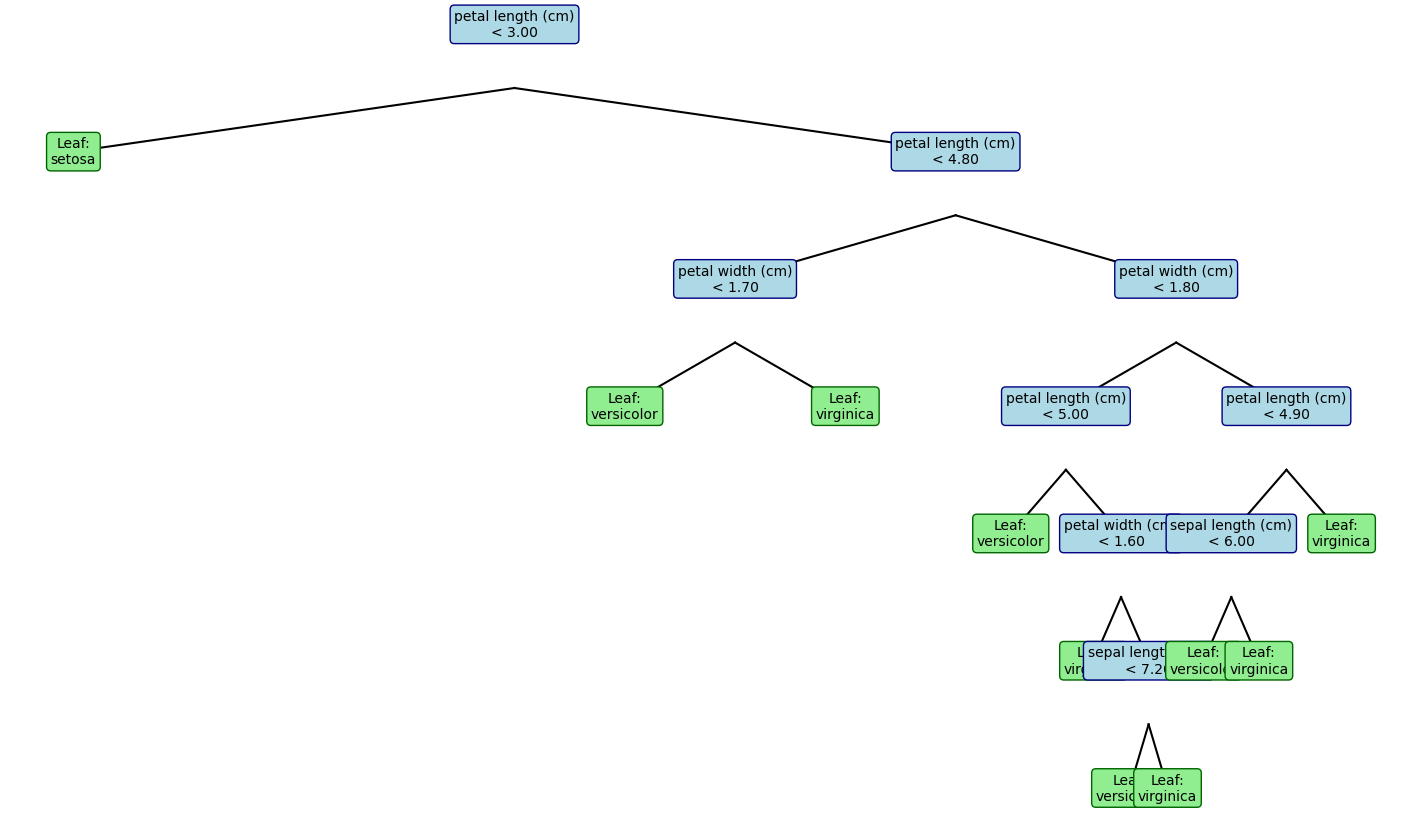

In [18]:
# 🔷 Visualize the Decision Tree 🔷


def plot_tree(node, x=0.5, y=1.0, dx=0.7, dy=0.3, ax=None, depth=0, max_depth=None):
    # First time setup
    if ax is None:
        fig, ax = plt.subplots(figsize=(18, 10))  # Larger canvas helps!
        ax.set_axis_off()

        # Calculate tree depth if not given
        if max_depth is None:
            max_depth = get_tree_depth(node)

    # Leaf Node
    if 'Leaf' in node:
        ax.text(x, y, f"Leaf:\n{node['Leaf']}",
                ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='lightgreen', edgecolor='darkgreen'),
                fontsize=10)
        return

    # Decision Node
    text = f"{node['Feature']}\n< {node['Value']:.2f}"
    ax.text(x, y, text,
            ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='navy'),
            fontsize=10)

    # Dynamic horizontal spacing based on depth
    spacing_factor = dx * (0.5 ** depth)
    spacing_factor = max(spacing_factor, 0.03)  # Avoid too small spacing

    # Left branch (True)
    ax.plot([x, x - spacing_factor], [y - dy / 2, y - dy], 'k-')
    plot_tree(node['TrueBranch'], x - spacing_factor, y - dy, dx, dy, ax, depth + 1, max_depth)

    # Right branch (False)
    ax.plot([x, x + spacing_factor], [y - dy / 2, y - dy], 'k-')
    plot_tree(node['FalseBranch'], x + spacing_factor, y - dy, dx, dy, ax, depth + 1, max_depth)

    # Show only at the top level recursion
    if depth == 0:
        plt.show()


def get_tree_depth(node):
    """Helper function to compute the max depth of a tree."""
    if 'Leaf' in node:
        return 0
    return 1 + max(get_tree_depth(node['TrueBranch']),
                   get_tree_depth(node['FalseBranch']))


plot_tree(tree)

In [19]:
# Learning Pruning and using it on the adult income dataset

# Importing required libraries
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset from UCI repository (or local CSV)
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

df = pd.read_csv(data_url, header=None, names=column_names, na_values=' ?')

print(df.head())

# Drop missing values
df = df.dropna()

# Preprocessing
label_encoders = {}

for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target
X = df.drop('income', axis=1)
y = df['income']  # 1 = >50K, 0 = <=50K

# Split into train and test sets (use lowercase variables for consistency)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree without pruning as an example
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
print("Accuracy (No Pruning):", accuracy_score(y_test, y_pred))


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [20]:
# adding pre-pruning
# Pre-Pruned Decision Tree Classifier
pre_pruned_clf = DecisionTreeClassifier(
    max_depth=6,  # Limit tree depth
    min_samples_split=10,  # Minimum samples required to split a node
    min_samples_leaf=5,  # Minimum samples required at a leaf node
    random_state=42
)

# Train the model
pre_pruned_clf.fit(X_train, y_train)

# Predict on test data
y_pred_pruned = pre_pruned_clf.predict(X_test)

# Evaluate accuracy
print("Accuracy (Pre-Pruning):", accuracy_score(y_test, y_pred_pruned))


Accuracy (Pre-Pruning): 0.8529753025029008


CCP Alphas: [0.00000000e+00 1.94268308e-05 2.00535027e-05 ... 2.03252409e-02
 2.60866537e-02 6.05602996e-02]


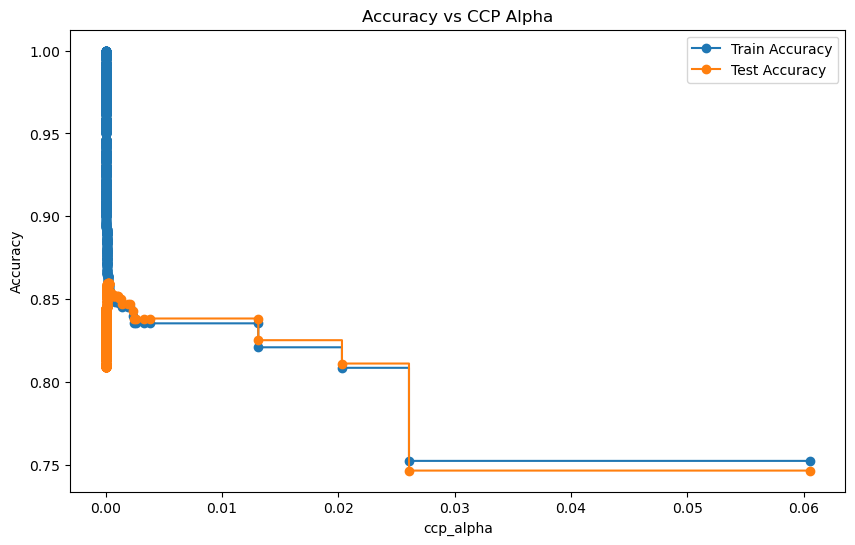

Best alpha: 0.00020
Accuracy (Post-Pruned): 0.859771258080557
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4503
           1       0.76      0.65      0.70      1530

    accuracy                           0.86      6033
   macro avg       0.82      0.79      0.81      6033
weighted avg       0.86      0.86      0.86      6033



In [21]:
# post-pruning
# Full decision tree (no restrictions)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas  # List of alpha values
impurities = path.impurities  # Total impurity of leaves with corresponding alphas

print("CCP Alphas:", ccp_alphas)
clfs = []  # A list to store each pruned tree

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs CCP Alpha")
plt.legend()
plt.show()
best_index = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[best_index]

print(f"Best alpha: {best_alpha:.5f}")
post_pruned_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
post_pruned_clf.fit(X_train, y_train)

# Predict on test data
y_pred_post_pruned = post_pruned_clf.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy (Post-Pruned):", accuracy_score(y_test, y_pred_post_pruned))
print(classification_report(y_test, y_pred_post_pruned))


In [22]:
# handling class imbalance

# option 1: balanced
from sklearn.tree import DecisionTreeClassifier

clf_balanced = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',  # <-- MAGIC
    ccp_alpha=best_alpha  # use this if you're doing post-pruning
)

clf_balanced.fit(X_train, y_train)
y_pred = clf_balanced.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy (with class_weight='balanced'):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy (with class_weight='balanced'): 0.8060666335156639
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4503
           1       0.58      0.85      0.69      1530

    accuracy                           0.81      6033
   macro avg       0.76      0.82      0.77      6033
weighted avg       0.85      0.81      0.82      6033



In [23]:
# option 2: SMOTE
from imblearn.over_sampling import SMOTE

# Resample training data only!
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_resampled.value_counts())
clf_smote = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_smote.fit(X_resampled, y_resampled)

y_pred = clf_smote.predict(X_test)

print("Accuracy (with SMOTE):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


After SMOTE: income
0    18151
1    18151
Name: count, dtype: int64
Accuracy (with SMOTE): 0.8332504558262888
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4503
           1       0.66      0.70      0.68      1530

    accuracy                           0.83      6033
   macro avg       0.78      0.79      0.78      6033
weighted avg       0.84      0.83      0.83      6033

